In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *

In [3]:
path = Path('/floyd/home/cassava-leaves/cassava_diseases')

In [4]:
tfms = get_transforms(flip_vert=True)

In [5]:
(path).ls()

[PosixPath('/floyd/home/cassava-leaves/cassava_diseases/.ipynb_checkpoints'),
 PosixPath('/floyd/home/cassava-leaves/cassava_diseases/test'),
 PosixPath('/floyd/home/cassava-leaves/cassava_diseases/train'),
 PosixPath('/floyd/home/cassava-leaves/cassava_diseases/models')]

In [6]:
data = (ImageList.from_folder(path/'train')
        .split_by_rand_pct(0.2)
        .label_from_folder()
        .add_test_folder(path/'test')
        .transform(tfms, size=224)
        .databunch(bs=64))

In [7]:
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (4525 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
cmd,cmd,cmd,cmd,cmd
Path: /floyd/home/cassava-leaves/cassava_diseases/train;

Valid: LabelList (1131 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
cbsd,cmd,cbsd,cbb,cmd
Path: /floyd/home/cassava-leaves/cassava_diseases/train;

Test: LabelList (3774 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: EmptyLabelList
,,,,
Path: /floyd/home/cassava-leaves/cassava_diseases/train

In [8]:
data.classes

['cbb', 'cbsd', 'cgm', 'cmd', 'healthy']

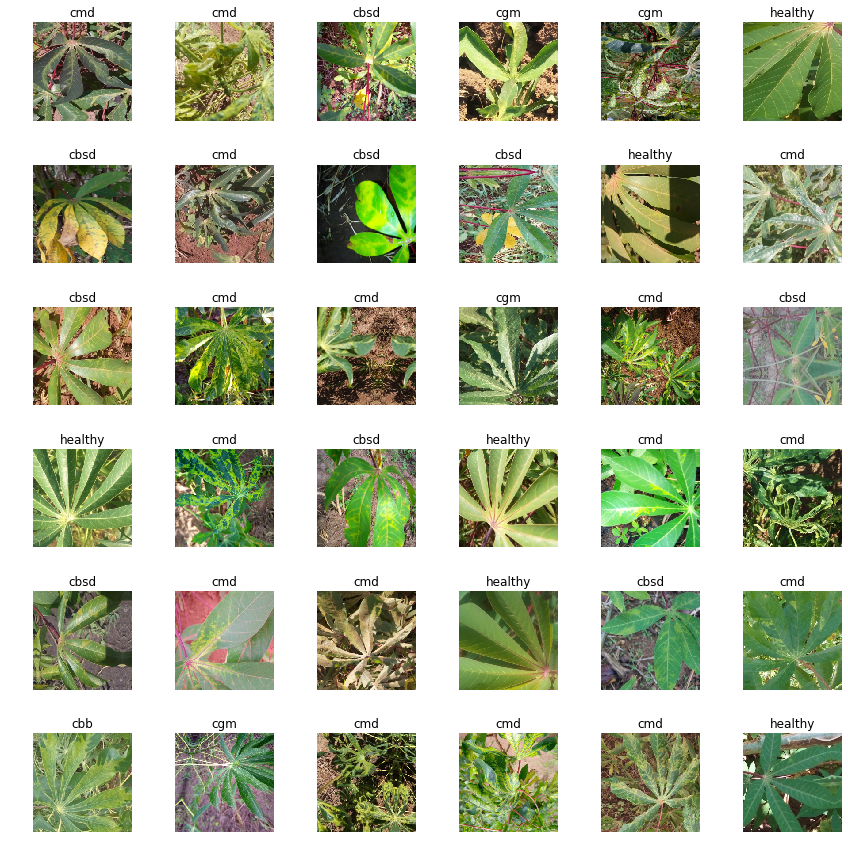

In [9]:
data.show_batch(rows=6, figsize=(12,12))

In [10]:
learn = cnn_learner(data, models.resnet34, metrics=[error_rate, accuracy])

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.torch/models/resnet34-333f7ec4.pth
87306240it [00:03, 26272563.77it/s]


In [11]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.382251,0.865204,0.310345,0.689655,01:48
1,0.996335,0.711662,0.259063,0.740937,01:44
2,0.850395,0.643845,0.236074,0.763926,01:44
3,0.743222,0.612217,0.236074,0.763926,01:44
4,0.704696,0.582288,0.213970,0.786030,01:46
5,0.656123,0.563857,0.204244,0.795756,01:45
6,0.611093,0.563971,0.202476,0.797524,01:46
7,0.610562,0.558421,0.203360,0.796640,01:45


In [14]:
learn.save('cassava-1-rn-34', return_path=True)

PosixPath('/floyd/home/cassava-leaves/cassava_diseases/train/models/cassava-1-rn-34.pth')

In [15]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


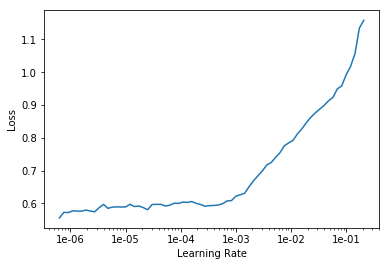

In [16]:
learn.lr_find()
learn.recorder.plot()

In [17]:
learn.fit_one_cycle(5, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.608196,0.548649,0.198939,0.801061,01:46
1,0.593949,0.532340,0.192750,0.807250,01:45
2,0.560636,0.510558,0.175066,0.824934,01:46
3,0.559498,0.503917,0.166225,0.833775,01:46
4,0.537748,0.506801,0.170645,0.829355,01:46


In [18]:
learn.save('cassava-2-rn-34', return_path=True)

PosixPath('/floyd/home/cassava-leaves/cassava_diseases/train/models/cassava-2-rn-34.pth')

In [21]:
interp = ClassificationInterpretation.from_learner(learn)

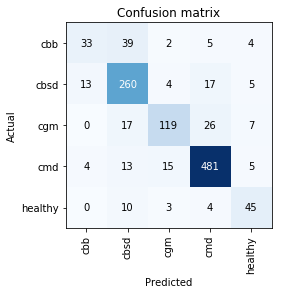

In [22]:
interp.plot_confusion_matrix()

In [23]:
interp.most_confused()

[('cbb', 'cbsd', 39),
 ('cgm', 'cmd', 26),
 ('cbsd', 'cmd', 17),
 ('cgm', 'cbsd', 17),
 ('cmd', 'cgm', 15),
 ('cbsd', 'cbb', 13),
 ('cmd', 'cbsd', 13),
 ('healthy', 'cbsd', 10),
 ('cgm', 'healthy', 7),
 ('cbb', 'cmd', 5),
 ('cbsd', 'healthy', 5),
 ('cmd', 'healthy', 5),
 ('cbb', 'healthy', 4),
 ('cbsd', 'cgm', 4),
 ('cmd', 'cbb', 4),
 ('healthy', 'cmd', 4),
 ('healthy', 'cgm', 3),
 ('cbb', 'cgm', 2)]

In [5]:
data = (ImageList.from_folder(path/'train')
        .split_by_rand_pct(0.2)
        .label_from_folder()
        .add_test_folder(path/'test')
        .transform(tfms, size=320)
        .databunch(bs=64//2))

In [6]:
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (4525 items)
x: ImageList
Image (3, 320, 320),Image (3, 320, 320),Image (3, 320, 320),Image (3, 320, 320),Image (3, 320, 320)
y: CategoryList
cbsd,cbsd,cbsd,cbsd,cbsd
Path: /floyd/home/cassava-leaves/cassava_diseases/train;

Valid: LabelList (1131 items)
x: ImageList
Image (3, 320, 320),Image (3, 320, 320),Image (3, 320, 320),Image (3, 320, 320),Image (3, 320, 320)
y: CategoryList
cbsd,cmd,cmd,cmd,cgm
Path: /floyd/home/cassava-leaves/cassava_diseases/train;

Test: LabelList (3774 items)
x: ImageList
Image (3, 320, 320),Image (3, 320, 320),Image (3, 320, 320),Image (3, 320, 320),Image (3, 320, 320)
y: EmptyLabelList
,,,,
Path: /floyd/home/cassava-leaves/cassava_diseases/train

In [8]:
learn = cnn_learner(data, models.resnet50, metrics=[error_rate, accuracy])

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.torch/models/resnet50-19c8e357.pth
102502400it [00:01, 88478753.50it/s]


In [9]:
learn.fit_one_cycle(6)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.985552,0.759078,0.242263,0.757737,02:57
1,0.719692,0.542991,0.183908,0.816092,02:38
2,0.598948,0.527875,0.175950,0.824050,02:38
3,0.535412,0.494395,0.162688,0.837312,02:38
4,0.467747,0.479613,0.150309,0.849691,02:38
5,0.439300,0.471976,0.145889,0.854111,02:38


In [10]:
learn.save('cassava-1-rn-50', return_path=True)

PosixPath('/floyd/home/cassava-leaves/cassava_diseases/train/models/cassava-1-rn-50.pth')

In [12]:
learn.load('cassava-1-rn-50')

Learner(data=ImageDataBunch;

Train: LabelList (4525 items)
x: ImageList
Image (3, 320, 320),Image (3, 320, 320),Image (3, 320, 320),Image (3, 320, 320),Image (3, 320, 320)
y: CategoryList
cbsd,cbsd,cbsd,cbsd,cbsd
Path: /floyd/home/cassava-leaves/cassava_diseases/train;

Valid: LabelList (1131 items)
x: ImageList
Image (3, 320, 320),Image (3, 320, 320),Image (3, 320, 320),Image (3, 320, 320),Image (3, 320, 320)
y: CategoryList
cbsd,cmd,cmd,cmd,cgm
Path: /floyd/home/cassava-leaves/cassava_diseases/train;

Test: LabelList (3774 items)
x: ImageList
Image (3, 320, 320),Image (3, 320, 320),Image (3, 320, 320),Image (3, 320, 320),Image (3, 320, 320)
y: EmptyLabelList
,,,,
Path: /floyd/home/cassava-leaves/cassava_diseases/train, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3,

In [13]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


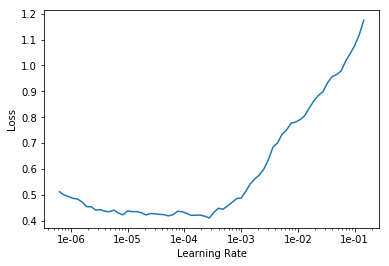

In [14]:
learn.lr_find()
learn.recorder.plot()

In [15]:
learn.fit_one_cycle(4, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.401330,0.460019,0.141468,0.858532,03:18
1,0.399518,0.463611,0.142352,0.857648,03:18
2,0.389706,0.448458,0.135279,0.864721,03:18
3,0.363509,0.455660,0.137047,0.862953,03:17


In [16]:
learn.save('cassava-2-rn-50', return_path=True)

PosixPath('/floyd/home/cassava-leaves/cassava_diseases/train/models/cassava-2-rn-50.pth')

In [17]:
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.352001,0.451742,0.130858,0.869142,03:17
1,0.334597,0.445789,0.128205,0.871795,03:17


In [18]:
learn.save('cassava-2-rn-50', return_path=True)

PosixPath('/floyd/home/cassava-leaves/cassava_diseases/train/models/cassava-2-rn-50.pth')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


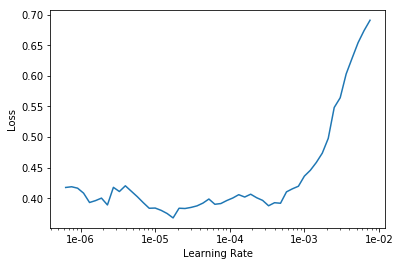

In [19]:
learn.lr_find()
learn.recorder.plot()

In [20]:
learn.fit_one_cycle(3, slice(1e-5))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.329825,0.453054,0.135279,0.864721,03:23
1,0.322811,0.447042,0.133510,0.866490,03:25
2,0.339098,0.441435,0.131742,0.868258,03:25


In [21]:
tfms = get_transforms(flip_vert=True, max_zoom=1.3, max_lighting=0.5, max_warp=0.5, p_affine=0.8, p_lighting=0.8)

In [22]:
data = (ImageList.from_folder(path/'train')
        .split_by_rand_pct(0.2)
        .label_from_folder()
        .add_test_folder(path/'test')
        .transform(tfms, size=320)
        .databunch(bs=64//2))

In [23]:
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (4525 items)
x: ImageList
Image (3, 320, 320),Image (3, 320, 320),Image (3, 320, 320),Image (3, 320, 320),Image (3, 320, 320)
y: CategoryList
cbsd,cbsd,cbsd,cbsd,cbsd
Path: /floyd/home/cassava-leaves/cassava_diseases/train;

Valid: LabelList (1131 items)
x: ImageList
Image (3, 320, 320),Image (3, 320, 320),Image (3, 320, 320),Image (3, 320, 320),Image (3, 320, 320)
y: CategoryList
cmd,cgm,cmd,cmd,cmd
Path: /floyd/home/cassava-leaves/cassava_diseases/train;

Test: LabelList (3774 items)
x: ImageList
Image (3, 320, 320),Image (3, 320, 320),Image (3, 320, 320),Image (3, 320, 320),Image (3, 320, 320)
y: EmptyLabelList
,,,,
Path: /floyd/home/cassava-leaves/cassava_diseases/train

In [24]:
learn = cnn_learner(data, models.resnet50, metrics=[error_rate, accuracy], pretrained=False).load('cassava-2-rn-50')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


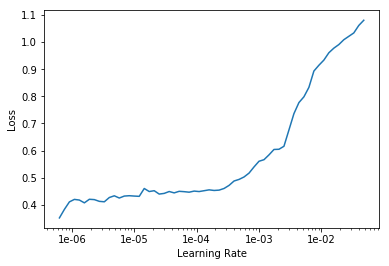

In [25]:
learn.lr_find()
learn.recorder.plot()

In [26]:
learn.fit_one_cycle(5, slice(3e-5))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.460986,0.289155,0.089302,0.910698,03:24
1,0.468056,0.282277,0.086649,0.913351,03:25
2,0.456227,0.290161,0.093722,0.906278,03:25
3,0.427972,0.287998,0.090186,0.909814,03:24
4,0.454152,0.284552,0.087533,0.912467,03:25


In [27]:
learn = cnn_learner(data, models.resnet50, metrics=[error_rate, accuracy], pretrained=False, ps=0.2, wd=0.001)
learn.load('cassava-2-rn-50')

Learner(data=ImageDataBunch;

Train: LabelList (4525 items)
x: ImageList
Image (3, 320, 320),Image (3, 320, 320),Image (3, 320, 320),Image (3, 320, 320),Image (3, 320, 320)
y: CategoryList
cbsd,cbsd,cbsd,cbsd,cbsd
Path: /floyd/home/cassava-leaves/cassava_diseases/train;

Valid: LabelList (1131 items)
x: ImageList
Image (3, 320, 320),Image (3, 320, 320),Image (3, 320, 320),Image (3, 320, 320),Image (3, 320, 320)
y: CategoryList
cmd,cgm,cmd,cmd,cmd
Path: /floyd/home/cassava-leaves/cassava_diseases/train;

Test: LabelList (3774 items)
x: ImageList
Image (3, 320, 320),Image (3, 320, 320),Image (3, 320, 320),Image (3, 320, 320),Image (3, 320, 320)
y: EmptyLabelList
,,,,
Path: /floyd/home/cassava-leaves/cassava_diseases/train, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, 

In [28]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


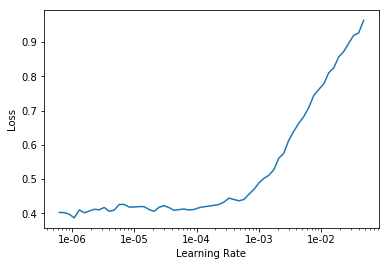

In [29]:
learn.lr_find()
learn.recorder.plot()

In [30]:
learn.fit_one_cycle(5, slice(1e-4))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.454547,0.281636,0.088417,0.911583,03:24
1,0.422279,0.286808,0.088417,0.911583,03:25
2,0.433550,0.291561,0.083996,0.916004,03:25
3,0.399879,0.291726,0.091954,0.908046,03:25
4,0.396483,0.294191,0.087533,0.912467,03:25


In [31]:
learn.fit_one_cycle(3, slice(1e-4))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.388783,0.297822,0.093722,0.906278,03:24
1,0.380435,0.303497,0.091954,0.908046,03:25
2,0.347382,0.289390,0.084881,0.915119,03:25


In [32]:
learn.save('cassava-2-rn-50', return_path=True)

PosixPath('/floyd/home/cassava-leaves/cassava_diseases/train/models/cassava-2-rn-50.pth')

In [4]:
tfms = get_transforms(flip_vert=True, max_zoom=1.3, max_lighting=0.5, max_warp=0.5, p_affine=0.8, p_lighting=0.8)

In [5]:
data = (ImageList.from_folder(path/'train')
        .split_by_rand_pct(0.2)
        .label_from_folder()
        .add_test_folder(path/'test')
        .transform(tfms, size=320)
        .databunch(bs=64//2))

In [6]:
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (4525 items)
x: ImageList
Image (3, 320, 320),Image (3, 320, 320),Image (3, 320, 320),Image (3, 320, 320),Image (3, 320, 320)
y: CategoryList
cbsd,cbsd,cbsd,cbsd,cbsd
Path: /floyd/home/cassava-leaves/cassava_diseases/train;

Valid: LabelList (1131 items)
x: ImageList
Image (3, 320, 320),Image (3, 320, 320),Image (3, 320, 320),Image (3, 320, 320),Image (3, 320, 320)
y: CategoryList
cmd,cmd,cmd,cmd,cmd
Path: /floyd/home/cassava-leaves/cassava_diseases/train;

Test: LabelList (3774 items)
x: ImageList
Image (3, 320, 320),Image (3, 320, 320),Image (3, 320, 320),Image (3, 320, 320),Image (3, 320, 320)
y: EmptyLabelList
,,,,
Path: /floyd/home/cassava-leaves/cassava_diseases/train

In [7]:
learn = cnn_learner(data, models.resnet50, metrics=[error_rate, accuracy], pretrained=False, ps=0.2, wd=0.001)
learn.load('cassava-2-rn-50')

Learner(data=ImageDataBunch;

Train: LabelList (4525 items)
x: ImageList
Image (3, 320, 320),Image (3, 320, 320),Image (3, 320, 320),Image (3, 320, 320),Image (3, 320, 320)
y: CategoryList
cbsd,cbsd,cbsd,cbsd,cbsd
Path: /floyd/home/cassava-leaves/cassava_diseases/train;

Valid: LabelList (1131 items)
x: ImageList
Image (3, 320, 320),Image (3, 320, 320),Image (3, 320, 320),Image (3, 320, 320),Image (3, 320, 320)
y: CategoryList
cmd,cmd,cmd,cmd,cmd
Path: /floyd/home/cassava-leaves/cassava_diseases/train;

Test: LabelList (3774 items)
x: ImageList
Image (3, 320, 320),Image (3, 320, 320),Image (3, 320, 320),Image (3, 320, 320),Image (3, 320, 320)
y: EmptyLabelList
,,,,
Path: /floyd/home/cassava-leaves/cassava_diseases/train, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, 

In [8]:
learn.unfreeze()

In [10]:
learn.fit_one_cycle(3, slice(1e-4))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.342202,0.263211,0.077807,0.922193,00:49
1,0.352072,0.278975,0.082228,0.917772,00:50
2,0.348476,0.264249,0.080460,0.919540,00:49


In [4]:
tfms = get_transforms(flip_vert=True)

In [5]:
data = (ImageList.from_folder(path/'train')
        .split_by_rand_pct(0.2)
        .label_from_folder()
        .add_test_folder(path/'test')
        .transform(tfms, size=320)
        .databunch(bs=64//2))

In [6]:
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (4525 items)
x: ImageList
Image (3, 320, 320),Image (3, 320, 320),Image (3, 320, 320),Image (3, 320, 320),Image (3, 320, 320)
y: CategoryList
cbsd,cbsd,cbsd,cbsd,cbsd
Path: /floyd/home/cassava-leaves/cassava_diseases/train;

Valid: LabelList (1131 items)
x: ImageList
Image (3, 320, 320),Image (3, 320, 320),Image (3, 320, 320),Image (3, 320, 320),Image (3, 320, 320)
y: CategoryList
cbsd,cmd,cmd,cgm,cbsd
Path: /floyd/home/cassava-leaves/cassava_diseases/train;

Test: LabelList (3774 items)
x: ImageList
Image (3, 320, 320),Image (3, 320, 320),Image (3, 320, 320),Image (3, 320, 320),Image (3, 320, 320)
y: EmptyLabelList
,,,,
Path: /floyd/home/cassava-leaves/cassava_diseases/train

In [8]:
learn = cnn_learner(data, models.resnet101, metrics=[error_rate, accuracy])

Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to /root/.torch/models/resnet101-5d3b4d8f.pth
178728960it [00:02, 82009105.35it/s]


In [9]:
learn.fit_one_cycle(6)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.927551,0.770429,0.221927,0.778072,00:55
1,0.692641,0.525575,0.180371,0.819629,00:51
2,0.575973,0.509371,0.176835,0.823165,00:51
3,0.503941,0.433729,0.144120,0.855880,00:51
4,0.450689,0.417275,0.135279,0.864721,00:52
5,0.396153,0.421555,0.132626,0.867374,00:51


In [10]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


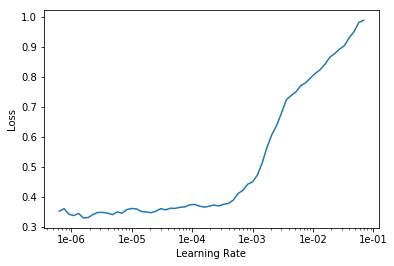

In [11]:
learn.lr_find()
learn.recorder.plot()

In [12]:
learn.fit_one_cycle(8, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.402547,0.410561,0.131742,0.868258,01:00
1,0.400687,0.392752,0.129089,0.870911,01:01
2,0.377366,0.398513,0.130858,0.869142,01:01
3,0.331391,0.403046,0.130858,0.869142,01:01
4,0.311231,0.385282,0.119363,0.880637,01:01
5,0.292352,0.384265,0.121132,0.878868,01:01
6,0.289711,0.387051,0.119363,0.880637,01:01
7,0.283411,0.386572,0.121132,0.878868,01:01


In [13]:
learn.get_preds(DatasetType.Test)

[tensor([[7.9817e-01, 2.0110e-01, 3.5722e-04, 2.0538e-04, 1.6721e-04],
         [2.0425e-01, 5.6433e-01, 4.3028e-02, 4.6062e-03, 1.8378e-01],
         [1.1065e-02, 2.9732e-01, 2.3788e-03, 6.7989e-01, 9.3396e-03],
         ...,
         [7.1152e-03, 8.8502e-02, 7.3021e-03, 8.9639e-01, 6.8806e-04],
         [9.6078e-01, 3.3907e-02, 3.0452e-03, 2.1746e-03, 9.2595e-05],
         [7.1308e-04, 7.4177e-01, 1.9486e-01, 6.1640e-02, 1.0098e-03]]),
 tensor([0, 0, 0,  ..., 0, 0, 0])]